In [1]:
import os, maboss
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [2]:
def plot(series, colors = ['black', 'blue', 'red']):
    plt.figure(figsize=(20,20))
    for i, serie in enumerate(series):
        
        for subserie in serie:
            x = subserie.index.values/24
            y = subserie.values
            plt.semilogy(x, y, color=colors[i])
        
    plt.legend([subserie.name for serie in series for subserie in serie ])
    plt.xlabel = "days"
    plt.ylabel = "population ratio"

## Simulation of TCR2 activation

#### Initial

In [3]:
t0 = time.time()
upp_actr2 = maboss.UpdatePopulation(
    maboss.load(
        "TregModel_InitPop.bnd",
        "TregModel_InitPop_ActTCR2.cfg",
    ),
    "TregModel_InitPop.upp"
)

upp_actr2_result = upp_actr2.run(workdir="TregModel_InitPop")

serie_actr2 = upp_actr2_result.get_population_ratios()
serie_actr2.name = "TCR2 activation"

print("Simulation done in %.2fs" % (time.time()-t0))

Simulation done in 0.33s


In [4]:
t0 = time.time()
upp_actr2_tgfb = maboss.UpdatePopulation(
    maboss.load(
        "TregModel_InitPop.bnd",
        "TregModel_InitPop_ActTCR2_TGFB.cfg",
    ),
    "TregModel_InitPop.upp"
)

upp_actr2_tgfb_result = upp_actr2_tgfb.run(workdir="TregModel_InitPop_TGFB")

serie_actr2_tgfb = upp_actr2_tgfb_result.get_population_ratios()
serie_actr2_tgfb.name = "TCR2 activation + TGFB"

print("Simulation done in %.2fs" % (time.time()-t0))

Simulation done in 0.31s


In [5]:
t0 = time.time()
spd_actr2 = upp_actr2_result.get_stepwise_probability_distribution(nb_cores=6)
print("States table computed in %.2fs" % (time.time()-t0))

States table computed in 193.47s


In [6]:
t0 = time.time()
spd_actr2_tgfb = upp_actr2_tgfb_result.get_stepwise_probability_distribution(nb_cores=6)
print("States table computed in %.2fs" % (time.time()-t0))

States table computed in 538.16s


In [7]:
t0 = time.time()

npd_actr2 = upp_actr2_result.get_nodes_stepwise_probability_distribution(
    nodes=["IL2", "TGFB"], 
    nb_cores=6
)
print("Node table computed in %.2fs" % (time.time()-t0))

Node table computed in 17.90s


In [8]:
t0 = time.time()
npd_actr2_tgfb = upp_actr2_tgfb_result.get_nodes_stepwise_probability_distribution(
    nodes=["IL2", "TGFB"], 
    nb_cores=6
)
print("Node table computed in %.2fs" % (time.time()-t0))

Node table computed in 68.48s


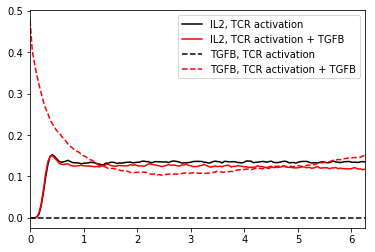

In [9]:
serie_actr_il2 = npd_actr2.loc[:, "IL2"].copy()
serie_actr_il2.name = "IL2, TCR activation"
serie_actr_il2.index/=24
serie_actr_il2.plot(legend=True, color='black')

serie_actr_tgfb_il2 = npd_actr2_tgfb.loc[:, "IL2"].copy()
serie_actr_tgfb_il2.name = "IL2, TCR activation + TGFB"
serie_actr_tgfb_il2.index/=24
serie_actr_tgfb_il2.plot(legend=True, color='red')

serie_actr_tgfb = npd_actr2.loc[:, "TGFB"].copy()
serie_actr_tgfb.name = "TGFB, TCR activation"
serie_actr_tgfb.index/=24
serie_actr_tgfb.plot(legend=True, color='black', linestyle='--')


serie_actr_tgfb_tgfb = npd_actr2_tgfb.loc[:, "TGFB"].copy()
serie_actr_tgfb_tgfb.name = "TGFB, TCR activation + TGFB"
serie_actr_tgfb_tgfb.index/=24
serie_actr_tgfb_tgfb.plot(legend=True, color='red', linestyle='--')
